In [1]:
#Loading the dataset

import pandas as pd
df = pd.read_csv("Advertising.csv", usecols=lambda column: column != 'Unnamed: 0')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Splitting

In [2]:
# Spliting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
import pandas as pd



# Split data into features (X) and target (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set shapes:
X_train: (160, 3)
y_train: (160,)

Testing set shapes:
X_test: (40, 3)
y_test: (40,)


# scaling the data using standardization


In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Display scaled training features
print("Scaled Training Features:")
print(X_train_scaled)

# Display scaled testing features
print("\nScaled Testing Features:")
print(X_test_scaled)


Scaled Training Features:
[[-4.04248386e-01 -1.02823707e+00 -3.37675384e-01]
 [ 3.20607716e-01 -9.19827737e-01 -1.16143931e+00]
 [-1.27051084e+00  2.59123702e-01  2.54250789e-01]
 [-1.04235941e+00 -6.96233499e-01 -5.74445854e-01]
 [ 8.79103401e-01 -1.38734296e+00 -7.07629243e-01]
 [-1.32873699e+00 -1.29926038e+00 -7.96418169e-01]
 [-9.43731452e-01 -4.65863678e-01  5.35415722e-01]
 [-3.23140256e-02  6.94073782e-02 -5.34984109e-01]
 [-5.39713297e-01 -1.16374872e+00  2.19721762e-01]
 [-8.75998996e-01  3.13328366e-01 -6.87898371e-01]
 [-8.53421511e-01  1.62101588e+00  2.24654481e-01]
 [ 2.18414888e-01 -1.06889056e+00 -8.45745350e-01]
 [-1.67928215e+00  1.76330312e+00  2.22240532e+00]
 [-1.68997675e+00  1.08574483e+00  1.01882210e+00]
 [-8.74810708e-01 -1.49575229e+00 -7.47090988e-01]
 [-2.45017701e-01 -1.16374872e+00  6.68075010e-02]
 [-9.10459368e-01 -3.98107848e-01 -8.40812632e-01]
 [ 1.65980907e+00  1.31611465e+00  1.04841841e+00]
 [-1.54975868e+00 -1.88064775e-01 -6.38571189e-01]
 [ 5.

# Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize Linear Regression model
linear_reg_model = LinearRegression()

# Define hyperparameters to search
param_grid = {
    'fit_intercept': [True, False]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(linear_reg_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model with tuned hyperparameters
best_linear_reg_model = grid_search.best_estimator_

# Predict on the scaled testing features
y_test_pred = best_linear_reg_model.predict(X_test_scaled)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Perform cross-validation to get predicted values
y_cv_pred = cross_val_predict(best_linear_reg_model, X_train_scaled, y_train, cv=5)

# Calculate MSE using cross-validation
mse_cv = mean_squared_error(y_train, y_cv_pred)

# Calculate R-squared using cross-validation
r2_cv = np.mean(cross_val_score(best_linear_reg_model, X_train_scaled, y_train, cv=5, scoring='r2'))

print("Best Linear Regression Model Metrics:")
print("Mean Squared Error (MSE) on Testing Data:", mse_test)
print("R-Squared (R2) on Testing Data:", r2_test)
print("Mean Squared Error (MSE) using Cross-Validation:", mse_cv)
print("Average R-Squared (R2) using Cross-Validation:", r2_cv)


Best Linear Regression Model Metrics:
Mean Squared Error (MSE) on Testing Data: 3.174097353976107
R-Squared (R2) on Testing Data: 0.8994380241009119
Mean Squared Error (MSE) using Cross-Validation: 2.9433926025900394
Average R-Squared (R2) using Cross-Validation: 0.8594884313276514


# polynomial regression model

In [7]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

# Initialize Polynomial Regression model
polynomial_reg_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model on the scaled training features
polynomial_reg_model.fit(X_train_scaled, y_train)

# Predict on the scaled testing features
y_test_pred = polynomial_reg_model.predict(X_test_scaled)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Perform cross-validation to get predicted values
y_cv_pred = cross_val_predict(polynomial_reg_model, X_train_scaled, y_train, cv=5)

# Calculate MSE using cross-validation
mse_cv = mean_squared_error(y_train, y_cv_pred)

# Calculate R-squared using cross-validation
r2_cv = np.mean(cross_val_score(polynomial_reg_model, X_train_scaled, y_train, cv=5, scoring='r2'))

print("Polynomial Regression Model Metrics:")
print("Mean Squared Error (MSE) on Testing Data:", mse_test)
print("R-Squared (R2) on Testing Data:", r2_test)
print("Mean Squared Error (MSE) using Cross-Validation:", mse_cv)
print("Average R-Squared (R2) using Cross-Validation:", r2_cv)


Polynomial Regression Model Metrics:
Mean Squared Error (MSE) on Testing Data: 0.4129102285379017
R-Squared (R2) on Testing Data: 0.9869181490609604
Mean Squared Error (MSE) using Cross-Validation: 0.4882133752459832
Average R-Squared (R2) using Cross-Validation: 0.9772385008669214


# Ridge Regression

In [8]:
from sklearn.linear_model import Ridge


# Initialize Ridge Regression model
ridge_reg_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter

# Train the model on the scaled training features
ridge_reg_model.fit(X_train_scaled, y_train)

# Predict on the scaled testing features
y_test_pred = ridge_reg_model.predict(X_test_scaled)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Perform cross-validation to get predicted values
y_cv_pred = cross_val_predict(ridge_reg_model, X_train_scaled, y_train, cv=5)

# Calculate MSE using cross-validation
mse_cv = mean_squared_error(y_train, y_cv_pred)

# Calculate R-squared using cross-validation
r2_cv = np.mean(cross_val_score(ridge_reg_model, X_train_scaled, y_train, cv=5, scoring='r2'))

print("Ridge Regression Model Metrics:")
print("Mean Squared Error (MSE) on Testing Data:", mse_test)
print("R-Squared (R2) on Testing Data:", r2_test)
print("Mean Squared Error (MSE) using Cross-Validation:", mse_cv)
print("Average R-Squared (R2) using Cross-Validation:", r2_cv)


Ridge Regression Model Metrics:
Mean Squared Error (MSE) on Testing Data: 3.1941558922079643
R-Squared (R2) on Testing Data: 0.8988025280800617
Mean Squared Error (MSE) using Cross-Validation: 2.945615462110152
Average R-Squared (R2) using Cross-Validation: 0.8596615496108058


# Random Forest Regressor


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters

# Train the model on the scaled training features
random_forest_model.fit(X_train_scaled, y_train)

# Predict on the scaled testing features
y_test_pred = random_forest_model.predict(X_test_scaled)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Perform cross-validation to get predicted values
y_cv_pred = cross_val_predict(random_forest_model, X_train_scaled, y_train, cv=5)

# Calculate MSE using cross-validation
mse_cv = mean_squared_error(y_train, y_cv_pred)

# Calculate R-squared using cross-validation
r2_cv = np.mean(cross_val_score(random_forest_model, X_train_scaled, y_train, cv=5, scoring='r2'))

print("Random Forest Regressor Model Metrics:")
print("Mean Squared Error (MSE) on Testing Data:", mse_test)
print("R-Squared (R2) on Testing Data:", r2_test)
print("Mean Squared Error (MSE) using Cross-Validation:", mse_cv)
print("Average R-Squared (R2) using Cross-Validation:", r2_cv)


Random Forest Regressor Model Metrics:
Mean Squared Error (MSE) on Testing Data: 0.5867324999999992
R-Squared (R2) on Testing Data: 0.9814110996153599
Mean Squared Error (MSE) using Cross-Validation: 0.6833596062499994
Average R-Squared (R2) using Cross-Validation: 0.9691987771127458


# Compare Performance of the 4 models

In [12]:
import pandas as pd

# Create a DataFrame to store model metrics
model_metrics = pd.DataFrame(columns=['Model', 'MSE Test', 'R2 Test', 'MSE CV', 'Avg R2 CV'])

# Add metrics for Linear Regression
model_metrics = model_metrics.append({
    'Model': 'Linear Regression',
    'MSE Test': 3.174,
    'R2 Test': 0.899,
    'MSE CV': 2.943,
    'Avg R2 CV': 0.859
}, ignore_index=True)

# Add metrics for Polynomial Regression
model_metrics = model_metrics.append({
    'Model': 'Polynomial Regression',
    'MSE Test': 0.413,
    'R2 Test': 0.987,
    'MSE CV': 0.488,
    'Avg R2 CV': 0.977
}, ignore_index=True)

# Add metrics for Ridge Regression
model_metrics = model_metrics.append({
    'Model': 'Ridge Regression',
    'MSE Test': 3.194,
    'R2 Test': 0.899,
    'MSE CV': 2.946,
    'Avg R2 CV': 0.860
}, ignore_index=True)

# Add metrics for Random Forest Regressor
model_metrics = model_metrics.append({
    'Model': 'Random Forest Regressor',
    'MSE Test': 0.587,
    'R2 Test': 0.981,
    'MSE CV': 0.683,
    'Avg R2 CV': 0.969
}, ignore_index=True)

# Display the model metrics
model_metrics


/var/folders/z0/_53pqkc52j94k8cbwvw_qgf40000gn/T/ipykernel_64049/3511483720.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_metrics = model_metrics.append({
/var/folders/z0/_53pqkc52j94k8cbwvw_qgf40000gn/T/ipykernel_64049/3511483720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_metrics = model_metrics.append({
/var/folders/z0/_53pqkc52j94k8cbwvw_qgf40000gn/T/ipykernel_64049/3511483720.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_metrics = model_metrics.append({
/var/folders/z0/_53pqkc52j94k8cbwvw_qgf40000gn/T/ipykernel_64049/3511483720.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_metric

,Model,MSE Test,R2 Test,MSE CV,Avg R2 CV
0,Linear Regression,3.174,0.899,2.943,0.859
1,Polynomial Regression,0.413,0.987,0.488,0.977
2,Ridge Regression,3.194,0.899,2.946,0.860
3,Random Forest Regressor,0.587,0.981,0.683,0.969


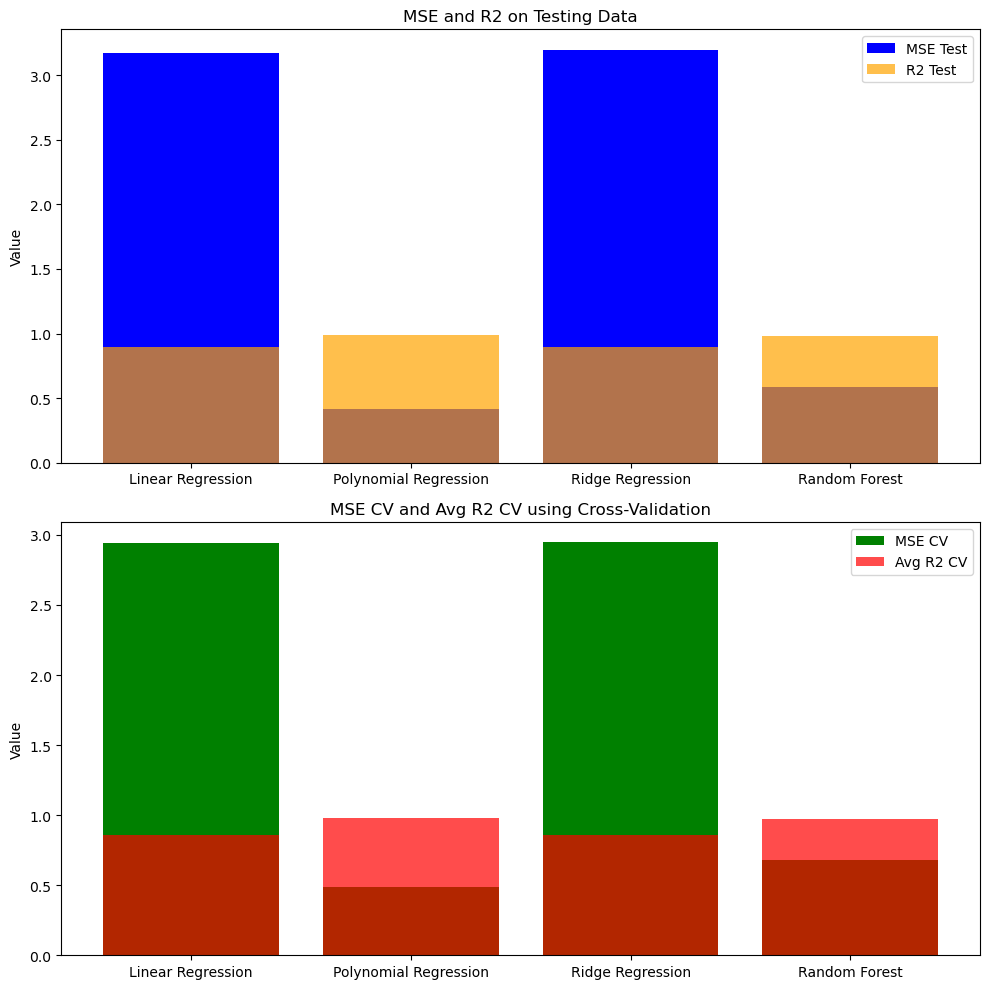

In [11]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Random Forest']

# Corresponding metrics values (MSE Test, R2 Test, MSE CV, Avg R2 CV)
mse_test = [3.174, 0.413, 3.194, 0.587]
r2_test = [0.899, 0.987, 0.899, 0.981]
mse_cv = [2.943, 0.488, 2.946, 0.683]
avg_r2_cv = [0.859, 0.977, 0.860, 0.969]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot MSE and R2 on the first subplot
axs[0].bar(models, mse_test, label='MSE Test', color='blue')
axs[0].bar(models, r2_test, label='R2 Test', color='orange', alpha=0.7)
axs[0].set_title('MSE and R2 on Testing Data')
axs[0].set_ylabel('Value')
axs[0].legend()

# Plot MSE CV and Avg R2 CV on the second subplot
axs[1].bar(models, mse_cv, label='MSE CV', color='green')
axs[1].bar(models, avg_r2_cv, label='Avg R2 CV', color='red', alpha=0.7)
axs[1].set_title('MSE CV and Avg R2 CV using Cross-Validation')
axs[1].set_ylabel('Value')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Model Interpretation


In [13]:
# Coefficient Analysis : Extracting the coefficients of the final model


# Initialize Polynomial Regression model
final_polynomial_reg_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model on the scaled training features
final_polynomial_reg_model.fit(X_train_scaled, y_train)

# Extract the coefficients of the model
coefficients = final_polynomial_reg_model.named_steps['linearregression'].coef_

# Print the coefficients
print("Coefficients of Polynomial Regression Model:")
print(coefficients)


Coefficients of Polynomial Regression Model:
[ 0.          3.59803711  2.85761244  0.08193084 -0.79521525  1.38016308
 -0.1259047   0.02893645  0.0373683   0.01149387]


In [14]:
#Extracting the coefficients of the Linear Regression model

from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
final_linear_reg_model = LinearRegression()

# Train the model on the scaled training features
final_linear_reg_model.fit(X_train_scaled, y_train)

# Extract the coefficients of the model
coefficients_linear = final_linear_reg_model.coef_

# Print the coefficients
print("Coefficients of Linear Regression Model:")
print(coefficients_linear)


Coefficients of Linear Regression Model:
[3.76419618 2.79230665 0.05597551]


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor model
final_random_forest_model = RandomForestRegressor()

# Train the model on the standardized training features
final_random_forest_model.fit(X_train_scaled, y_train)

# Extract feature importances
feature_importances = final_random_forest_model.feature_importances_

# Define the list of feature names (replace with your actual feature names)
feature_names = ['TV', 'Radio', 'Newspaper']

# Print feature importances
print("Feature Importances of Random Forest Regressor Model:")
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")


Feature Importances of Random Forest Regressor Model:
TV: 0.6228948513447439
Radio: 0.36499799629238683
Newspaper: 0.01210715236286926


# now given TV=50.0, radio = 100, and Newspaper = 45. lets use the Polynomial Regression model to predict what sale

In [19]:
# Given advertising budgets for prediction (scaled)
new_advertising_budgets_scaled = np.array([[50.0, 100, 45]])  # Make sure this input has 3 features

# Make the prediction using the trained model
predicted_sales = polynomial_reg_model.predict(new_advertising_budgets_scaled)

print("Predicted Sales:", predicted_sales)


Predicted Sales: [5594.4069423]


In [22]:
#Scaling the data before making prediction



# Given advertising budgets for prediction (scaled)
new_advertising_budgets = np.array([[50.0, 100, 45]])
new_advertising_budgets_scaled = scaler.transform(new_advertising_budgets)  # Use the same scaler as during training

# Reshape the input to match the expected shape
new_advertising_budgets_reshaped = new_advertising_budgets_scaled.reshape(1, -1)

# Make the prediction using the trained model
predicted_sales = polynomial_reg_model.predict(new_advertising_budgets_reshaped)

print("Predicted Sales:", predicted_sales)


Predicted Sales: [16.84313423]


/Users/AKB_CIM/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
